In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pip install mahotas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2
import os
import mahotas
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
print(os.listdir("../input/"))

['ckplus']


In [4]:
print(os.listdir("../input/ckplus/"))

['ck', 'CK+48']


In [5]:
print(os.listdir("../input/ckplus/CK+48"))

['surprise', 'fear', 'sadness', 'disgust', 'contempt', 'happy', 'anger']


In [6]:
dataset_path="/kaggle/input/ckplus/CK+48"

In [7]:
# Function to extract Zernike Moments from an image
def extract_zernike_moments(image_path, radius=21, degree=8):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Compute Zernike Moments
    moments = mahotas.features.zernike_moments(img, radius, degree)

    return img, moments

In [8]:
emotions=os.listdir("../input/ckplus/CK+48")
emotions

['surprise', 'fear', 'sadness', 'disgust', 'contempt', 'happy', 'anger']

In [9]:
# Function to display two images from each emotion folder
def display_images_from_emotion(emotion_folder):
    emotion_path = os.path.join(dataset_path, emotion_folder)
    image_files = os.listdir(emotion_path)[:1]  # Displaying 2 images

    plt.figure(figsize=(20, 10))
    plt.suptitle(f"Visualization for {emotion_folder} Emotion", fontsize=16)

    for i, image_file in enumerate(image_files, 1):
        image_path = os.path.join(emotion_path, image_file)
        img, moments = extract_zernike_moments(image_path)

        # Convert Zernike Moments to a string for annotation
        moments_str = ', '.join([f"{moment:.2f}" for moment in moments])

        # Display the original image with moments as text
        plt.subplot(2, 4, i*2-1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Original Image", fontsize=12)
        plt.text(10, img.shape[0] + 10, f"Zernike Moments:\n{moments_str}", color='white', fontsize=10, bbox=dict(facecolor='black', alpha=0.7))
        plt.axis('off')

        # Display Zernike Moments on the image
        plt.subplot(2, 4, i*2)
        plt.plot(moments)
        plt.title(f"Zernike Moments Line Plot", fontsize=12)
        plt.xlabel("Feature Index", fontsize=10)
        plt.ylabel("Moment Value", fontsize=10)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

/tmp/ipykernel_1443/857516856.py:30: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


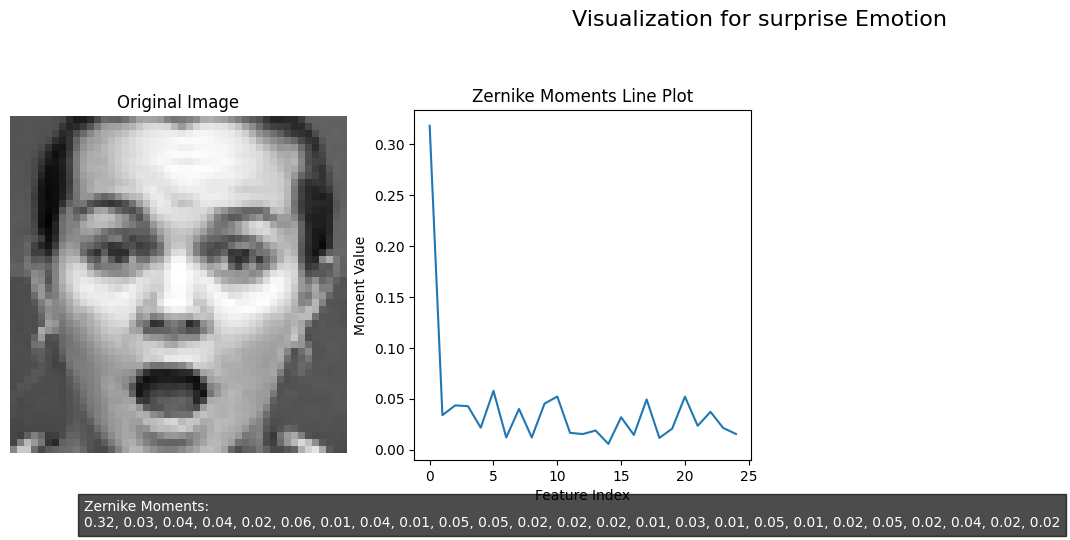

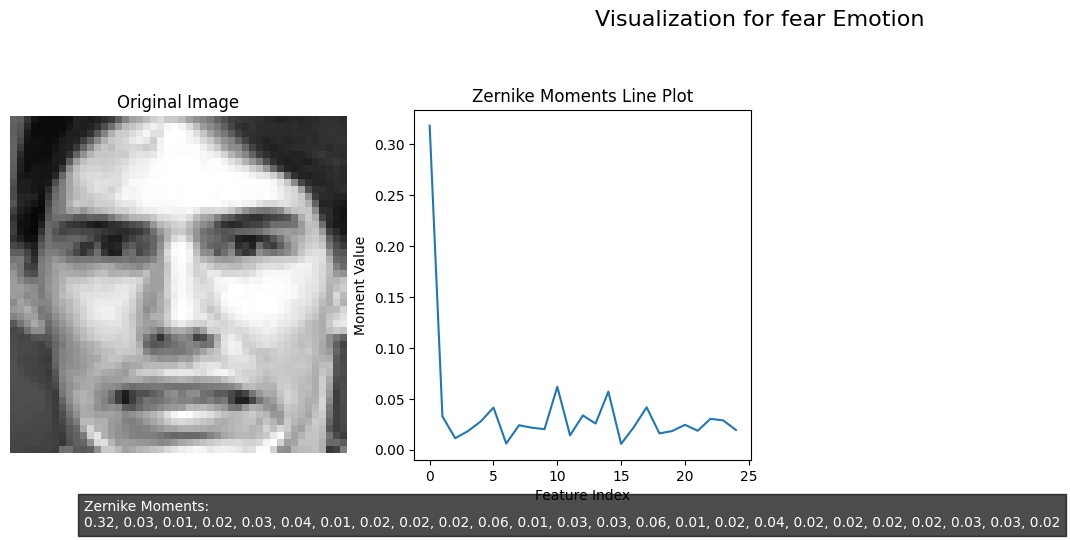

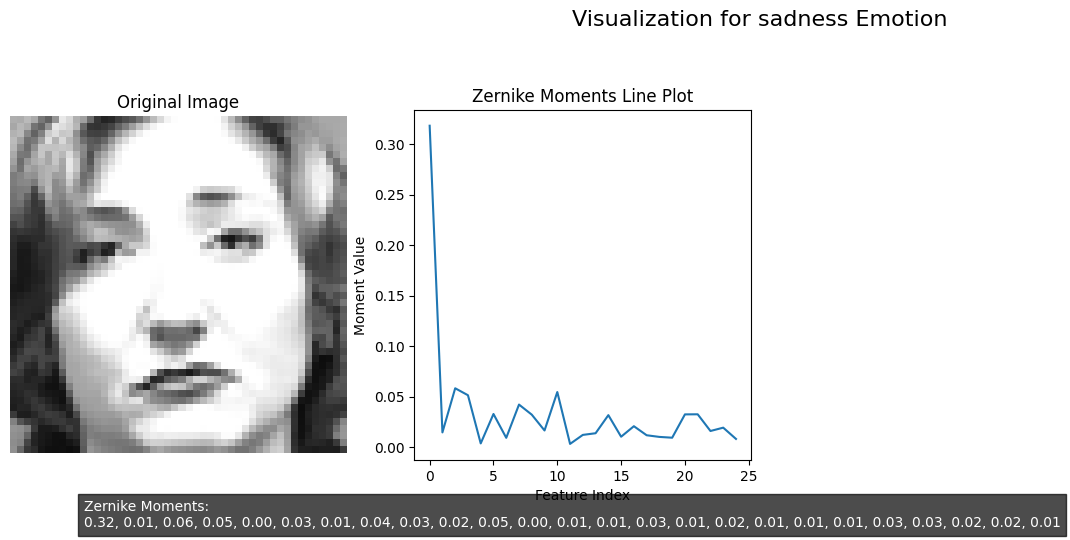

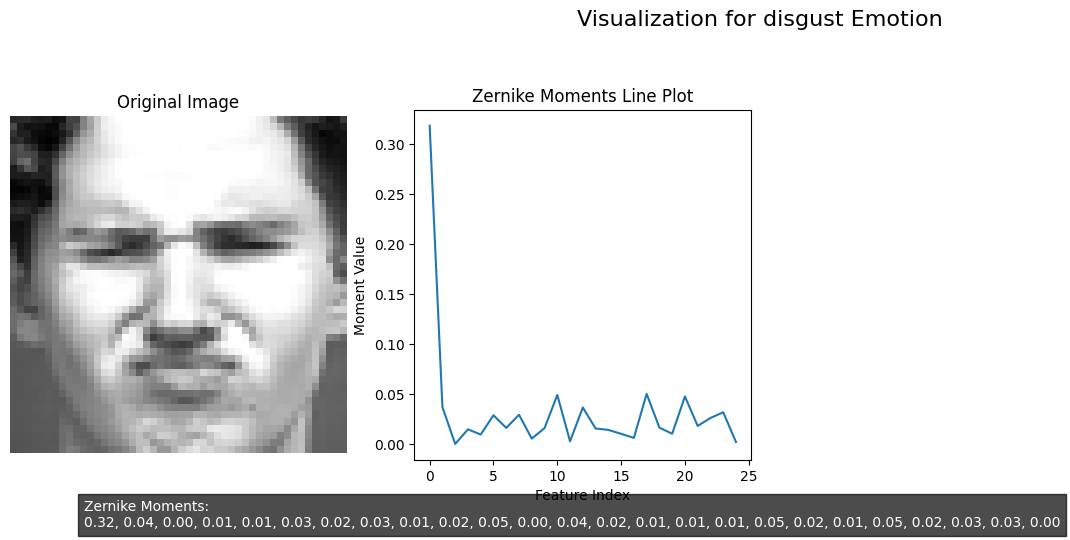

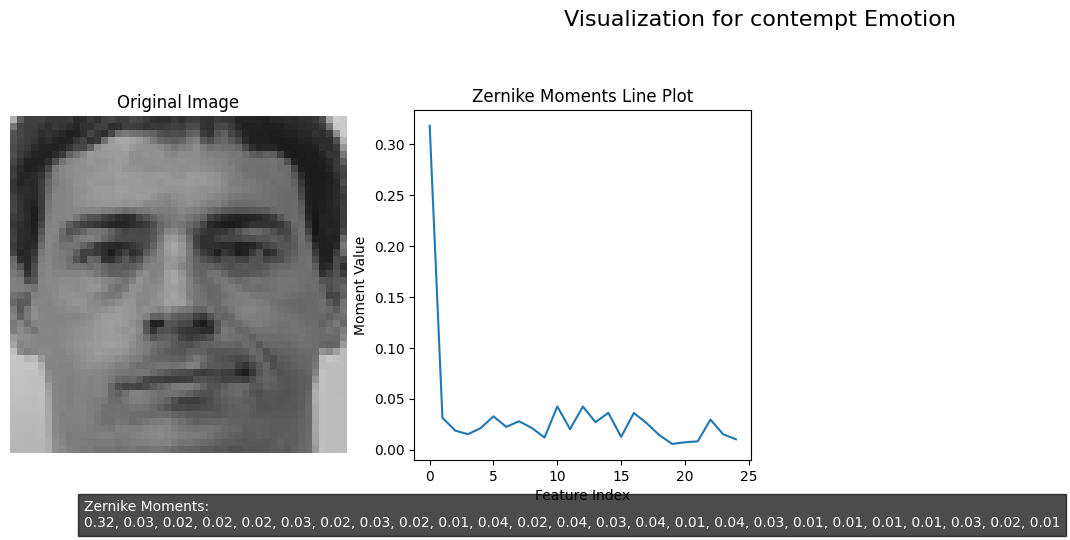

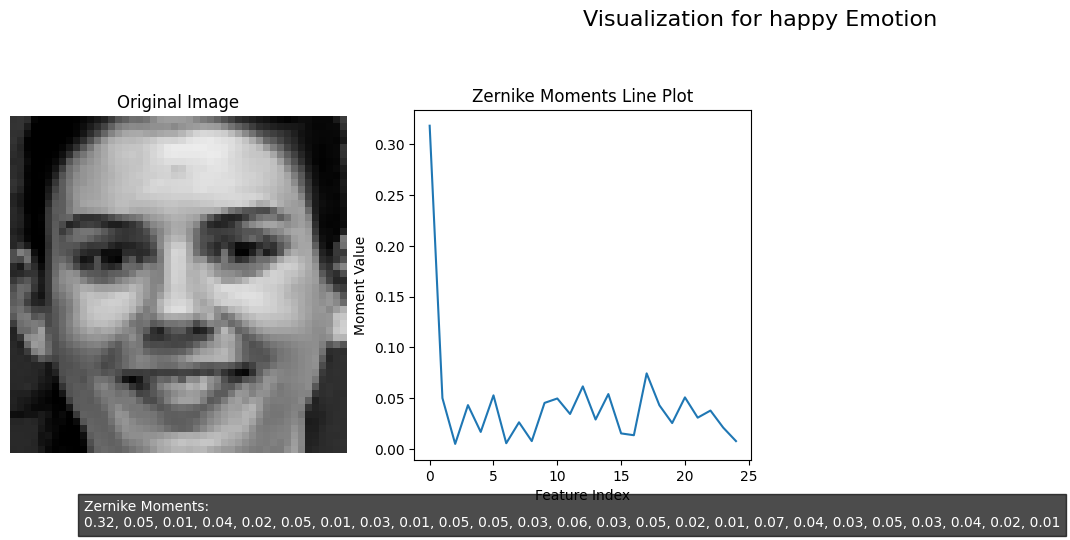

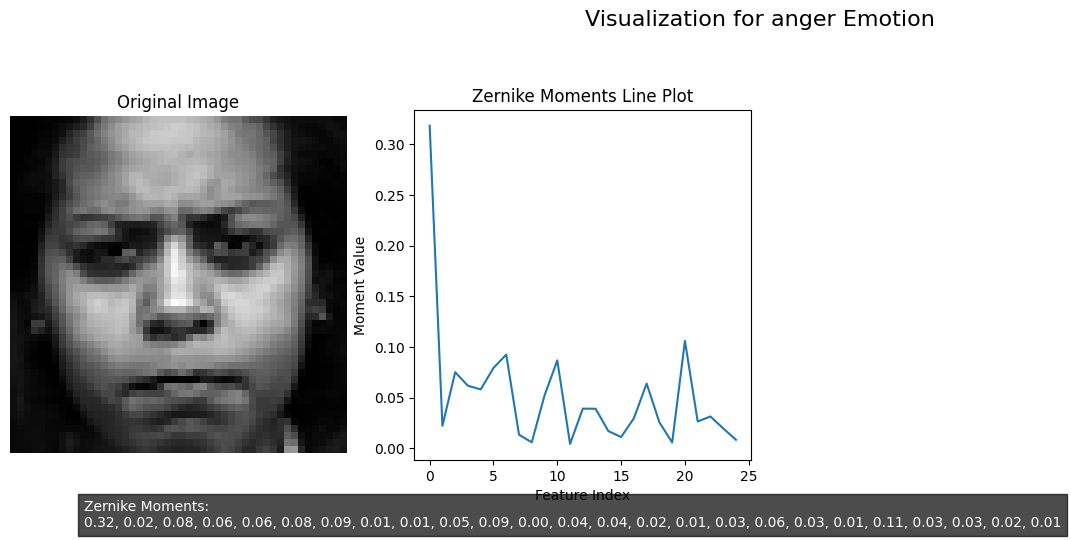

In [10]:

# Display two images from each emotion folder along with Zernike Moments
for emotion_folder in emotions:
    display_images_from_emotion(emotion_folder)

In [11]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

In [12]:
# Function to load and preprocess the CK+48 dataset
def load_and_preprocess_data(dataset_path):
    X = []
    y = []

    emotion_folders = os.listdir(dataset_path)
    label_mapping = {emotion: idx for idx, emotion in enumerate(emotion_folders)}

    for emotion_folder in emotion_folders:
        emotion_path = os.path.join(dataset_path, emotion_folder)
        image_files = os.listdir(emotion_path)

        for image_file in image_files:
            image_path = os.path.join(emotion_path, image_file)
            img, _ = extract_zernike_moments(image_path)

            # Resize the image if needed
            img = cv2.resize(img, (64, 64))

            X.append(img)
            y.append(label_mapping[emotion_folder])

    X = np.array(X)
    y = np.array(y)
     # Add channel dimension for grayscale images
    X = X.reshape(X.shape + (1,))


    return X, y

In [13]:
num_classes = len(emotions)
num_classes

7

In [14]:
# Load and preprocess the data
X, y = load_and_preprocess_data(dataset_path)

In [15]:
# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Assuming grayscale images with shape (64, 64)
input_shape = (64, 64, 1)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [17]:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [18]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10
25/25 [==============================] - 2s 56ms/step - loss: 267.4530 - accuracy: 0.2704 - val_loss: 17.0326 - val_accuracy: 0.2843
Epoch 2/10
25/25 [==============================] - 1s 46ms/step - loss: 4.6186 - accuracy: 0.4630 - val_loss: 1.4114 - val_accuracy: 0.5939
Epoch 3/10
25/25 [==============================] - 1s 45ms/step - loss: 1.1660 - accuracy: 0.6199 - val_loss: 1.1686 - val_accuracy: 0.6396
Epoch 4/10
25/25 [==============================] - 1s 48ms/step - loss: 0.8027 - accuracy: 0.7296 - val_loss: 0.7963 - val_accuracy: 0.7411
Epoch 5/10
25/25 [==============================] - 1s 46ms/step - loss: 0.5884 - accuracy: 0.8074 - val_loss: 0.5991 - val_accuracy: 0.8122
Epoch 6/10
25/25 [==============================] - 1s 46ms/step - loss: 0.4527 - accuracy: 0.8827 - val_loss: 0.4521 - val_accuracy: 0.8629
Epoch 7/10
25/25 [==============================] - 1s 46ms/step - loss: 0.3973 - accuracy: 0.9209 - val_loss: 0.3671 - val_accuracy: 0.9086
Epoch 8/10

In [19]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_val, y_val)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f'Test Loss: {test_loss * 100:.2f}%')

7/7 [==============================] - 0s 11ms/step - loss: 0.3184 - accuracy: 0.9391
Test Accuracy: 93.91%
Test Loss: 31.84%


In [28]:
hist=history.history

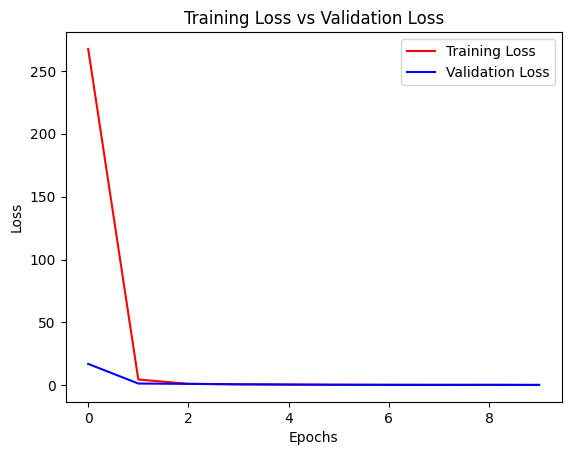

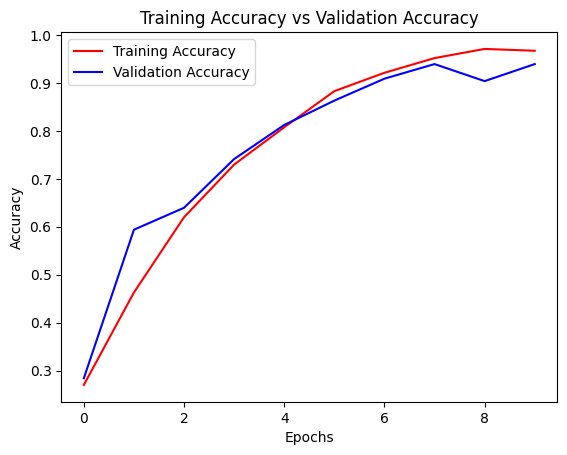

In [31]:
# Visualizing Training and Validation Loss
%matplotlib inline

train_loss = hist['loss']
val_loss = hist['val_loss']

epochs = range(len(train_loss))

plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualizing Training and Validation Accuracy
train_acc = hist['accuracy']
val_acc = hist['val_accuracy']

plt.plot(epochs, train_acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
# Make predictions on the validation set
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

7/7 [==============================] - 0s 11ms/step


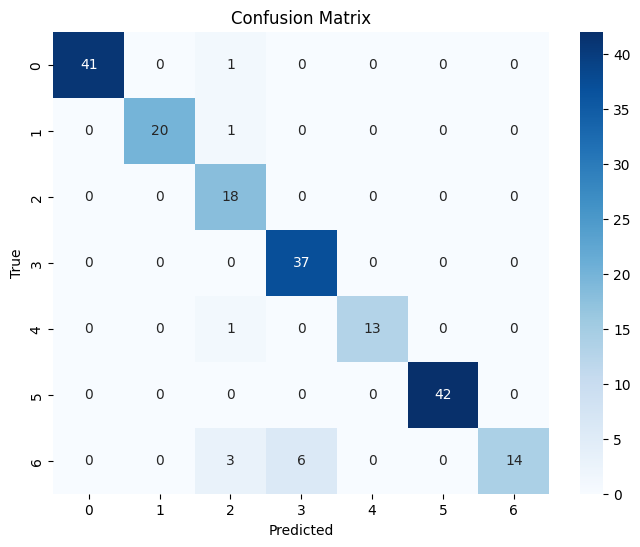

In [22]:
# Display the confusion matrix
cm = confusion_matrix(y_val, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [23]:
# Display the classification report
class_names = [str(emotion) for emotion in np.unique(y)]
print("Classification Report:\n", classification_report(y_val, y_pred_classes, target_names=class_names))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       1.00      0.95      0.98        21
           2       0.75      1.00      0.86        18
           3       0.86      1.00      0.92        37
           4       1.00      0.93      0.96        14
           5       1.00      1.00      1.00        42
           6       1.00      0.61      0.76        23

    accuracy                           0.94       197
   macro avg       0.94      0.92      0.92       197
weighted avg       0.95      0.94      0.94       197



In [24]:
# Function to create a directory if it doesn't exist
def create_directory(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
# Output directory for matched images
output_folder = '/kaggle/working/output_zernike'
create_directory(output_folder)

In [25]:
# Function to save combined image with Zernike Moments and line plot
def save_combined_image_and_plot(img, moments, output_folder, emotion_folder, filename):
    plt.figure(figsize=(10, 7))

    # Display the original image
    plt.subplot(2, 1, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Emotion: {emotion_folder}\nZernike Moments: {', '.join([f'{moment:.2f}' for moment in moments])}")
    plt.axis('off')

    # Display the line plot with Zernike Moments
    plt.subplot(2, 1, 2)
    plt.plot(moments)
    plt.title(f"Zernike Moments Line Plot")
    plt.xlabel("Moment Index")
    plt.ylabel("Moment Value")

    # Save the combined image with Zernike Moments and line plot
    output_path = os.path.join(output_folder, emotion_folder, filename)
    plt.savefig(output_path, bbox_inches='tight')
    plt.close()


In [26]:
# Function to process data and save combined images and line plots to the output directory
def process_data_and_save(dataset_path, output_folder):
    # List of emotion folders
    emotion_folders = os.listdir(dataset_path)

    # Iterate over each emotion folder
    for emotion_folder in emotion_folders:
        emotion_path = os.path.join(dataset_path, emotion_folder)
        output_emotion_folder = os.path.join(output_folder, emotion_folder)

        # Create output emotion folder if it doesn't exist
        os.makedirs(output_emotion_folder, exist_ok=True)

        # Process and save combined images and line plots for the emotion
        image_files = os.listdir(emotion_path)
        for i, image_file in enumerate(image_files, 1):
            image_path = os.path.join(emotion_path, image_file)
            img, moments = extract_zernike_moments(image_path)

            # Save the combined image with Zernike Moments and line plot
            save_combined_image_and_plot(img, moments, output_folder, emotion_folder, f"combined_{i}.png")
# Process data and save combined images and line plots to the output directory
process_data_and_save(dataset_path, output_folder)
print("Processing completed. Output saved in:", output_folder)

Processing completed. Output saved in: /kaggle/working/output_zernike
